In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('Data/credit-downsampled.csv')
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,Class
0,1.000000,54,0,0.000000,1666.0,1,0,0,0,0.0,0
1,0.497080,40,0,0.510355,4200.0,8,0,2,0,3.0,0
2,0.797681,40,1,0.047542,3070.0,6,0,0,0,2.0,0
3,0.043304,61,0,244.000000,NaN,14,0,0,0,0.0,0
4,0.810945,49,0,4.000000,NaN,1,0,0,0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 1   age                                   20052 non-null  int64  
 2   NumberOfTime30.59DaysPastDueNotWorse  20052 non-null  int64  
 3   DebtRatio                             20052 non-null  float64
 4   MonthlyIncome                         16380 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 6   NumberOfTimes90DaysLate               20052 non-null  int64  
 7   NumberRealEstateLoansOrLines          20052 non-null  int64  
 8   NumberOfTime60.89DaysPastDueNotWorse  20052 non-null  int64  
 9   NumberOfDependents                    19603 non-null  float64
 10  Class                                 20052 non-null  int64  
dtypes: float64(4), 

In [4]:
df.isna().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30.59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           3672
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60.89DaysPastDueNotWorse       0
NumberOfDependents                       449
Class                                      0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30.59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60.89DaysPastDueNotWorse    0
NumberOfDependents                      0
Class                                   0
dtype: int64

In [18]:
df.shape

(16380, 11)

In [19]:
df.corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,Class
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.018032,-0.002903,0.020080,-0.001177,-0.015389,-0.002690,0.006575,-0.002122,0.003746,-0.003094
age,-0.018032,1.000000,-0.067856,0.014225,0.065300,0.228955,-0.073650,0.119994,-0.066453,-0.181761,-0.212808
NumberOfTime30.59DaysPastDueNotWorse,-0.002903,-0.067856,1.000000,-0.004790,-0.027164,-0.101959,0.983255,-0.051015,0.988389,-0.008479,0.116061
DebtRatio,0.020080,0.014225,-0.004790,1.000000,-0.040021,0.032406,-0.004477,0.050533,-0.005158,0.010407,-0.002276
MonthlyIncome,-0.001177,0.065300,-0.027164,-0.040021,1.000000,0.133733,-0.032564,0.173106,-0.029555,0.059460,-0.053739
NumberOfOpenCreditLinesAndLoans,-0.015389,0.228955,-0.101959,0.032406,0.133733,1.000000,-0.137054,0.465870,-0.119055,0.000773,-0.058865
NumberOfTimes90DaysLate,-0.002690,-0.073650,0.983255,-0.004477,-0.032564,-0.137054,1.000000,-0.070775,0.990589,-0.011548,0.104071
NumberRealEstateLoansOrLines,0.006575,0.119994,-0.051015,0.050533,0.173106,0.465870,-0.070775,1.000000,-0.061069,0.070360,-0.008033
NumberOfTime60.89DaysPastDueNotWorse,-0.002122,-0.066453,0.988389,-0.005158,-0.029555,-0.119055,0.990589,-0.061069,1.000000,-0.013869,0.087787
NumberOfDependents,0.003746,-0.181761,-0.008479,0.010407,0.059460,0.000773,-0.011548,0.070360,-0.013869,1.000000,0.086732


<AxesSubplot:>

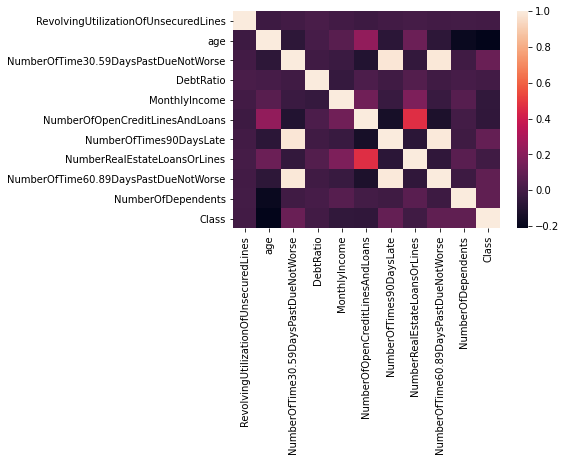

In [20]:
sn.heatmap(df.corr())

In [30]:
#Detecting multicollinearity using VIF
VIF_data = pd.DataFrame()
VIF_data['feature'] = df.columns

VIF_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
VIF_data

,feature,VIF
0,RevolvingUtilizationOfUnsecuredLines,1.001608
1,age,4.290178
2,NumberOfTime30.59DaysPastDueNotWorse,48.672815
3,DebtRatio,1.010586
4,MonthlyIncome,1.412612
5,NumberOfOpenCreditLinesAndLoans,4.615872
6,NumberOfTimes90DaysLate,58.239989
7,NumberRealEstateLoansOrLines,2.141558
8,NumberOfTime60.89DaysPastDueNotWorse,83.958512
9,NumberOfDependents,1.549859
